In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

from sklearn.decomposition import NMF, PCA

from scipy.sparse import *
from scipy.io import mmread

# Import auryn tools
sys.path.append(os.path.expanduser("/usr/local/auryn/tools/python/"))
from auryntools import *

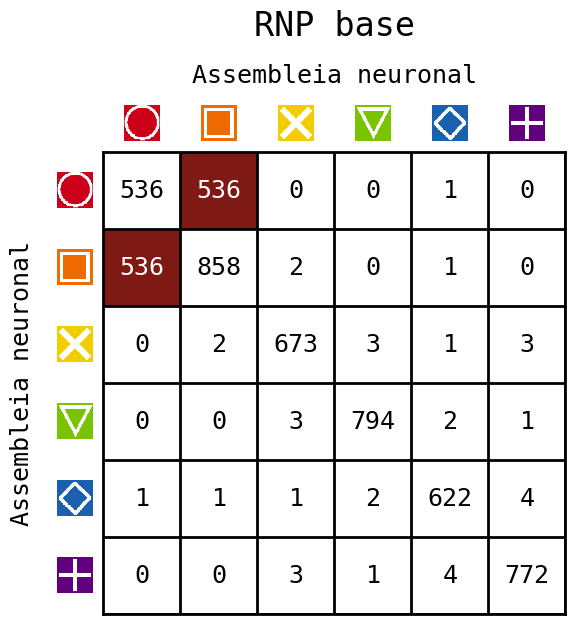

In [112]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


matrix = np.array([
  [536, 536,   0,   0,   1,   0],
  [536, 858,   2,   0,   1,   0],
  [  0,   2, 673,   3,   1,   3],
  [  0,   0,   3, 794,   2,   1],
  [  1,   1,   1,   2, 622,   4],
  [  0,   0,   3,   1,   4, 772]
])

matrix = np.array([
  [109, 106,   0, 107,   1,   0],
  [106, 483,   0, 483,   1,   0],
  [  0,   0, 777,   1,   1,  19],
  [107, 483,   1, 811,   3,   8],
  [  1,   1,   1,   3, 606,   2],
  [  0,   0,  19,   8,   2, 655]
])

# Create a normalized matrix based on difference from diagonal
normalized_matrix = np.zeros_like(matrix, dtype=float)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        if i == j:
            normalized_matrix[i,j] = 1
        else:
            normalized_matrix[i,j] = abs(matrix[i,j] - ((matrix[i,i] + matrix[j,j]) / 2.0)) / ((matrix[i,i] + matrix[j,j]) / 2.0)

colors = [(0.5, 0.1, 0.08), (1, 1, 1)]  # Dark Red to White
n_bins = [3, 6, 10, 100]  # Discretizes the interpolation into bins
cmap_name = "custom_diverging"
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)


plt.figure(figsize=(6,6))
plt.imshow(normalized_matrix, cmap=cm)

fontsize = 18

# Display numbers with increased fontsize
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(j, i, str(matrix[i, j]), ha='center', va='center', color='white' if normalized_matrix[i, j] < 0.5 else 'black', fontsize=fontsize)

ax = plt.gca()

# Add grid with white color to show borders
positions = np.arange(0, 6, 1)
labels = np.arange(1, 7, 1)
plt.xticks(positions, labels, fontsize=fontsize)
plt.yticks(positions, labels, fontsize=fontsize)
plt.tick_params(axis='both', which='both', length=0, pad=30)  # To hide tick marks
plt.tick_params(axis='x', direction='out', bottom=False, top=True, labelbottom=False, labeltop=True)
ax.set_xticklabels([''] * len(positions))
ax.set_yticklabels([''] * len(positions))

plt.gca().set_xticks(labels - 0.5, minor=True)
plt.gca().set_yticks(labels - 0.5, minor=True)
plt.grid(which='minor', color='black', linestyle='-', linewidth=2)

for spine in ax.spines.values():
    spine.set_linewidth(2)

for label in ax.xaxis.get_ticklabels():
    label.set_fontsize(fontsize)

ax.xaxis.set_label_position('top')
plt.xlabel('Assembleia neuronal', fontsize=fontsize, labelpad=20)
plt.ylabel('Assembleia neuronal', fontsize=fontsize, labelpad=20)

ax.set_title('RNP com sono', fontsize=24, pad=20)

plt.rcParams["font.family"] = "monospace"

imgs = ['circle.png', 'square.png', 'x.png', 'triangle.png', 'diamond.png', 'plus.png']

for i in positions:
    img = plt.imread(f"./stimuli/{imgs[i]}")
    imagebox = OffsetImage(img, zoom=0.4)  

    abx = AnnotationBbox(imagebox, (i, 0), frameon=False, boxcoords="data", pad=0, box_alignment=(0.5, -1.4))
    aby = AnnotationBbox(imagebox, (0, i), frameon=False, boxcoords="data", pad=0, box_alignment=(2.4, 0.5))

    ax.add_artist(abx)
    ax.add_artist(aby)

plt.show()


In [87]:
a_base = np.array([536,858,673,794,622,772])
a_sleep = np.array([109,483,777,811,606,655])

print(np.mean(a_base), np.mean(a_sleep))

# matrix = np.array([
#   [109, 106,   0, 107,   1,   0],
#   [106, 483,   0, 483,   1,   0],
#   [  0,   0, 777,   1,   1,  19],
#   [107, 483,   1, 811,   3,   8],
#   [  1,   1,   1,   3, 606,   2],
#   [  0,   0,  19,   8,   2, 655]
# ])

709.1666666666666 573.5


# Find low rank structure in spiking activity

In [3]:
# num_mpi_ranks = 4 # the number of sims you used in parallel
# datadir = os.path.expanduser("../data/sim_base")
# prefix = "rf4"

# number_neurons = 4096
# number_stimuli = 6
# time_range = 2400
# bin_size = 100e-3

In [4]:
# # Opens stim file
# stimfile = np.loadtxt("%s/%s.0.stimtimes"%(datadir,prefix))
# stimtimes = np.zeros(len(stimfile))
# stimdata = np.zeros((len(stimfile),number_stimuli))
# for i,row in enumerate(stimfile):
#     t,a,s = row
#     stimtimes[i] = t
#     stimdata[i,int(s)] = a
    
# # Opens spk output files
# spkfiles  = ["%s/%s.%i.e.spk"%(datadir,prefix,i) for i in range(num_mpi_ranks)]
# sfo = AurynBinarySpikeView(spkfiles)

# print("Crunching file ...")
# tm = sfo.t_max 
# t_start = tm-time_range
# t_stop  = tm
# data = sfo.time_binned_spike_counts(t_start,t_stop,bin_size=bin_size, max_neuron_id=number_neurons)

Warning! Version mismatch between the decoding tool and the file version.
AurynBinarySpikeFile (0, 8, 1)
Fileversion (0, 8, 2)
Warning! Version mismatch between the decoding tool and the file version.
AurynBinarySpikeFile (0, 8, 1)
Fileversion (0, 8, 2)
Warning! Version mismatch between the decoding tool and the file version.
AurynBinarySpikeFile (0, 8, 1)
Fileversion (0, 8, 2)
Warning! Version mismatch between the decoding tool and the file version.
AurynBinarySpikeFile (0, 8, 1)
Fileversion (0, 8, 2)
Crunching file ...


KeyboardInterrupt: 